In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [43]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/braian_pallister.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1416122994234171394,1416122994234171392,2021-07-17 01:20:06 India Standard Time,2021-07-17,01:20:06,530,523556031,brianpallister,Brian Pallister,,...,,,,,,[],,,,
1,1415441838681600000,1415441838681600000,2021-07-15 04:13:26 India Standard Time,2021-07-15,04:13:26,530,523556031,brianpallister,Brian Pallister,,...,,,,,,[],,,,
2,1415418886028238851,1415418886028238848,2021-07-15 02:42:14 India Standard Time,2021-07-15,02:42:14,530,523556031,brianpallister,Brian Pallister,,...,,,,,,[],,,,


In [44]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Thank', 'you,', 'Manitoba!', 'Because', 'of', 'your', 'choice', 'to', '#ProtectMB,', 'we', 'have', 'hit', 'our', 'second', 'milestone', 'of', 'the', '4-3-2-One', 'Great', 'Summer', 'Reopening', 'Path', 'early,', 'giving', 'Manitobans', 'the', 'chance', 'to', 'enjoy', 'our', 'province', 'with', 'less', 'restrictions.', 'Be', 'safe,', 'be', 'smart', 'and', 'together', 'we', 'can', 'beat', '#COVID19.', 'https://t.co/qkOb74mqzI', 'Congratulations', 'to', 'Arlen', 'Dumas', 'on', 'his', 're-election', 'as', 'Grand', 'Chief', 'of', 'the', 'Assembly', 'of', 'Manitoba', 'Chiefs!', 'Also', 'to', 'Cindy', 'Woodhouse', 'on', 'her', 'AFN', 'Regional', 'Chief', 'win!', 'We', 'look', 'forward', 'to', 'working', 'with', 'you', 'both!', 'As', 'super-sites', 'across', 'the', 'province', 'continue', 'to', 'receive', 'walk-ins', 'this', 'evening,', 'I', 'would', 'like', 'to', 'thank', 'all', 'Manitobans', 'who', 'stepped', 'up', 'today', 'to', 'continue', 'to', '#ProtectMB.', 'We', 'have', 'a', 'lot', '

In [45]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [46]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['thank',
 'you',
 'manitoba',
 'becaus',
 'of',
 'your',
 'choic',
 'to',
 'protectmb',
 'we',
 'have',
 'hit',
 'our',
 'second',
 'mileston',
 'of',
 'the',
 '432one',
 'great',
 'summer',
 'reopen',
 'path',
 'earli',
 'give',
 'manitoban',
 'the',
 'chanc',
 'to',
 'enjoy',
 'our',
 'provinc',
 'with',
 'less',
 'restrict',
 'be',
 'safe',
 'be',
 'smart',
 'and',
 'togeth',
 'we',
 'can',
 'beat',
 'covid19',
 'httpstcoqkob74mqzi',
 'congratul',
 'to',
 'arlen',
 'duma',
 'on',
 'his',
 'reelect',
 'as',
 'grand',
 'chief',
 'of',
 'the',
 'assembl',
 'of',
 'manitoba',
 'chief',
 'also',
 'to',
 'cindi',
 'woodhous',
 'on',
 'her',
 'afn',
 'region',
 'chief',
 'win',
 'we',
 'look',
 'forward',
 'to',
 'work',
 'with',
 'you',
 'both',
 'as',
 'supersit',
 'across',
 'the',
 'provinc',
 'continu',
 'to',
 'receiv',
 'walkin',
 'this',
 'even',
 'i',
 'would',
 'like',
 'to',
 'thank',
 'all',
 'manitoban',
 'who',
 'step',
 'up',
 'today',
 'to',
 'continu',
 'to',
 'protectmb'

In [47]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['thank',
 'manitoba',
 'becaus',
 'choic',
 'protectmb',
 'hit',
 'second',
 'mileston',
 '432one',
 'great',
 'summer',
 'reopen',
 'path',
 'earli',
 'manitoban',
 'chanc',
 'enjoy',
 'provinc',
 'restrict',
 'safe',
 'smart',
 'togeth',
 'beat',
 'covid19',
 'httpstcoqkob74mqzi',
 'congratul',
 'arlen',
 'duma',
 'reelect',
 'grand',
 'chief',
 'assembl',
 'manitoba',
 'chief',
 'cindi',
 'woodhous',
 'afn',
 'region',
 'chief',
 'win',
 'look',
 'forward',
 'work',
 'supersit',
 'provinc',
 'continu',
 'receiv',
 'walkin',
 'like',
 'thank',
 'manitoban',
 'step',
 'today',
 'continu',
 'protectmb',
 'lot',
 'celebr',
 'today',
 'manitoban',
 'answer',
 'wood',
 'mileston',
 'continu',
 'met',
 'covid19vaccin',
 'administ',
 'manitoban',
 'abl',
 'enjoy',
 'freedom',
 'expand',
 'indoor',
 'outdoor',
 'activ',
 'safe',
 'httpstcobjh2ktvsbl',
 'today',
 'manitoban',
 'step',
 'roll',
 'sleev',
 'mani',
 'supersit',
 'provinc',
 'walkin',
 'avail',
 'locat',
 'far',
 '520',
 'second

In [48]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [49]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 414, 2: 83, 3: 35, 4: 19, 5: 17, 6: 12, 7: 10, 8: 4, 10: 2, 31: 1, ...})

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


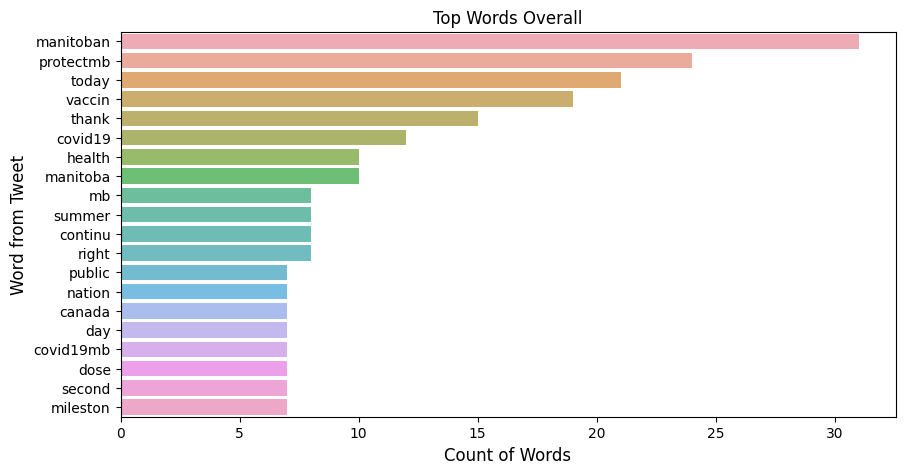

In [50]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [39]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [26]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [51]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


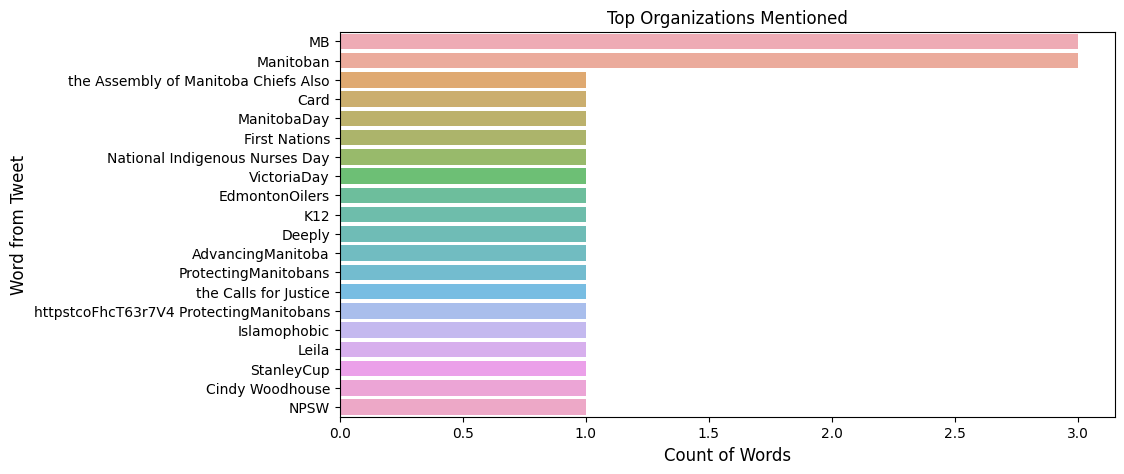

In [52]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [53]:
df.to_csv("pallister_count.csv")